In [1]:
'''
data-extractor.py

Trying to extract data from dataset 2
Target result: EEG, labels, channels, frequency
'''

'\ndata-extractor.py\n\nTrying to extract data from dataset 2\nTarget result: EEG, labels, channels, frequency\n'

In [1]:
# get dependency
import numpy as np
import scipy.io

In [2]:
# load matlab files
t = scipy.io.loadmat('/home/dhz/bci-data/data/A01T.mat', struct_as_record=True)

In [3]:
# show the keys of matlab files
t.keys()

dict_keys(['__header__', '__version__', '__globals__', 'h', 's'])

In [4]:
print(t['s'].shape)
signals = t['s']

(672528, 25)


In [5]:
typ = t['h']['EVENT'][0][0]['TYP'][0][0] # type of the event

In [6]:
pos = t['h']['EVENT'][0][0]['POS'][0][0] # position of the event happened in timeline

In [7]:
dur = t['h']['EVENT'][0][0]['DUR'][0][0] # duration of the event

In [8]:
print('shape of typ', typ.shape)
print('shape of pos', pos.shape)
print('shape of dur', dur.shape)

shape of typ (603, 1)
shape of pos (603, 1)
shape of dur (603, 1)


In [9]:
artifact_selection = t['h']['ArtifactSelection'][0][0]

In [10]:
print(artifact_selection.shape)

(288, 1)


In [11]:
C3 = signals[:, 7]
Cz = signals[:, 9]
C4 = signals[:, 11]
chan_list = ['C3', 'Cz', 'C4']
signal_list = [C3, Cz, C4]

In [12]:
print(C3)

[-22.50976562 -22.75390625 -20.41015625 ...  11.96289062   4.34570312
   4.83398438]


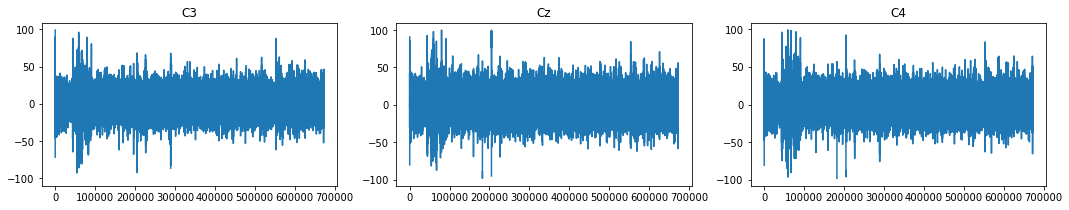

In [13]:
import matplotlib.pyplot as plt
import matplotlib as mpl

def signal_overview(signals, names):
    '''
    show the overview of EEG signals
    
    Parameters
    ---------
    signals: 2-d array
        the EEG signal data
    names: 1-d array
        the list of channels name
    '''
    plt.figure(figsize = (18, 3))
    for i in range(len(names)):
        plt.subplot(1, len(names), i + 1)
        plt.title(names[i])
        plt.plot(signals[i])
    plt.show()

signal_overview(signal_list, chan_list)

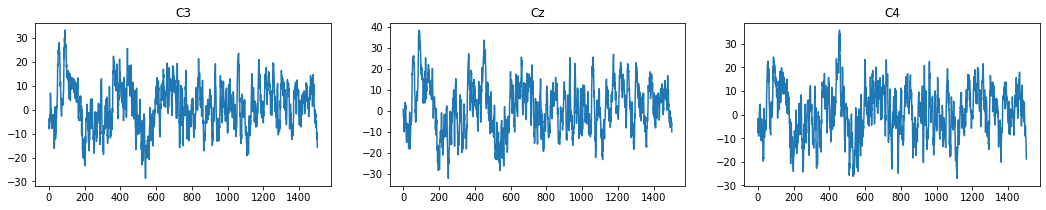

In [14]:
event_dict = {276: 'Idling EEG', 277: 'Idling EEG', 768: 'Start of a trial',
            769: 'Cue onset left (class 1)', 770: 'Cue onset right (class 2)',
            771: 'Cue onset foot (class 3)', 772: 'Cue onset tongue (class 4)',
            783: 'Cue unknown', 1023: 'Rejected trial', 1072: 'Eye movements',
            32766: 'Start of a new run'}

signal_overview([tmp[int(pos[8]):int(pos[9])] for tmp in signal_list],chan_list)

In [15]:
def eeg_classification(typ, pos, dur):
    '''
    put EEG signals into small pieces
    
    Parameters
    ---------
    typ: 1-d array
        the EEG signal type list
    pos: 1-d array
        the EEG signal position list
    dur: 1-d array
        the EEG signal duration list
        
    Return
    ------
    result: 3-d array
        classified EEG signal, from 769 to 772
    '''
    tag_class = [769, 770, 771, 772]
    result = {769: [], 770: [], 771: [], 772: []}
    for i in range(len(typ)):
        if(typ[i] in tag_class):
            result[int(typ[i])].append([tmp[int(pos[i]):(int(pos[i]) + int(dur[i]))] for tmp in signal_list])
    return result
eeg_dataset = eeg_classification(typ, pos, dur)

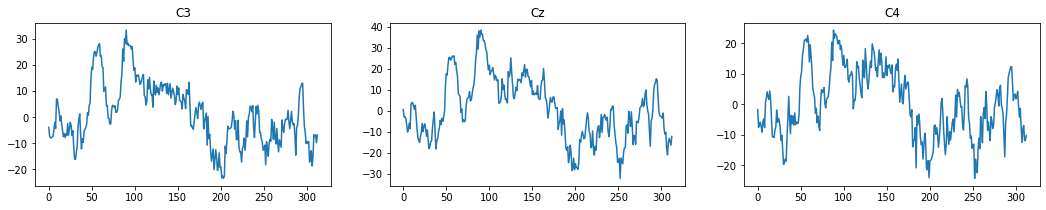

In [16]:
signal_overview(eeg_dataset[772][0], chan_list)

In [17]:
def eeg_save(eeg_dataset, filename):
    np.save(filename + '.npy', eeg_dataset)
    
eeg_save(eeg_dataset, 'A01T')

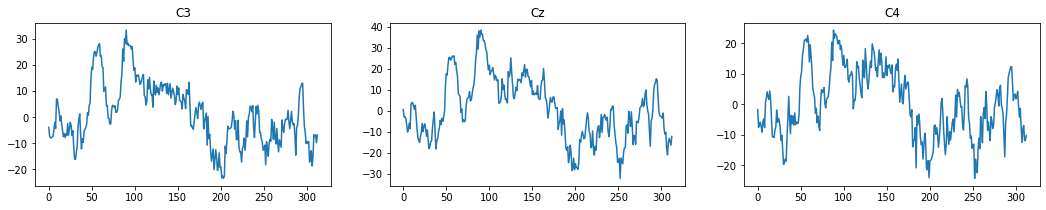

In [18]:
def load_eeg(filename):
    return np.load(filename + '.npy', allow_pickle = True).item()

test = load_eeg('A01T')
signal_overview(test[772][0], chan_list)

In [19]:
from data_extractor import Extractor

eeg_test = Extractor('/home/dhz/bci-data/data/A01T')

In [20]:
sig_test = eeg_test.eeg_classification()

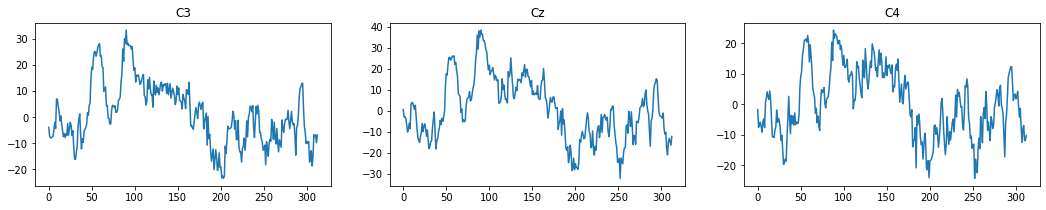

In [21]:
signal_overview(sig_test[772][0], chan_list)

In [22]:
print(sig_test[769][0][2].shape)

(313,)


In [23]:
def data_normalization(eeg_data):
    labels = []
    data = []
    for l in [769, 770, 771, 772]:
        for i in range(len(eeg_data[l])):
            labels.append(l)
            eeg_data[l][i] = [np.pad(x, (0, 512 - len(x)), 'constant') for x in eeg_data[l][i]]
            data.append([x.reshape((len(x), 1)) for x in eeg_data[l][i]])
            
    return np.array(labels), np.array(data)
labels, data = data_normalization(sig_test)
print('shape of labels:', labels.shape)
print('shape of data:', data.shape)

shape of labels: (288,)
shape of data: (288, 3, 512, 1)


In [24]:
print(data)

[[[[  4.6875    ]
   [  5.02929688]
   [  4.58984375]
   ...
   [  0.        ]
   [  0.        ]
   [  0.        ]]

  [[  5.61523438]
   [  3.75976562]
   [  2.44140625]
   ...
   [  0.        ]
   [  0.        ]
   [  0.        ]]

  [[  0.24414062]
   [  0.14648438]
   [  0.9765625 ]
   ...
   [  0.        ]
   [  0.        ]
   [  0.        ]]]


 [[[  0.43945312]
   [ -3.41796875]
   [  5.95703125]
   ...
   [  0.        ]
   [  0.        ]
   [  0.        ]]

  [[  8.0078125 ]
   [  0.68359375]
   [  8.05664062]
   ...
   [  0.        ]
   [  0.        ]
   [  0.        ]]

  [[ 11.47460938]
   [  2.5390625 ]
   [  8.3984375 ]
   ...
   [  0.        ]
   [  0.        ]
   [  0.        ]]]


 [[[  9.61914062]
   [ 13.42773438]
   [  3.515625  ]
   ...
   [  0.        ]
   [  0.        ]
   [  0.        ]]

  [[ 10.88867188]
   [ 12.93945312]
   [  2.9296875 ]
   ...
   [  0.        ]
   [  0.        ]
   [  0.        ]]

  [[ 12.54882812]
   [ 13.91601562]
   [  6.34765625]
   ...

In [1]:
# get dependency
import numpy as np
import scipy.io

In [2]:
# load matlab files
t = scipy.io.loadmat('/home/dhz/bci-data/data/A02T.mat', struct_as_record=True)

In [3]:
# show the keys of matlab files
t.keys()

dict_keys(['__header__', '__version__', '__globals__', 'hA02T', 'sA02T'])

In [6]:
print(t['sA02T'].shape)
signals = t['sA02T']

(677169, 25)


In [7]:
typ = t['hA02T']['EVENT'][0][0]['TYP'][0][0] # type of the event

In [1]:
# get dependency
import numpy as np
import scipy.io

In [2]:
# load matlab files
t = scipy.io.loadmat('/home/dhz/bci-data/data/A01E.mat', struct_as_record=True)

In [3]:
# show the keys of matlab files
t.keys()

dict_keys(['__header__', '__version__', '__globals__', 'h', 's'])

In [4]:
print(t['s'].shape)
signals = t['s']

(687000, 25)


In [5]:
typ = t['h']['EVENT'][0][0]['TYP'][0][0] # type of the event
print(typ)

[[32766]
 [  276]
 [32766]
 [  277]
 [32766]
 [ 1072]
 [32766]
 [  768]
 [  783]
 [  768]
 [  783]
 [  768]
 [  783]
 [  768]
 [  783]
 [  768]
 [  783]
 [  768]
 [  783]
 [  768]
 [  783]
 [  768]
 [  783]
 [  768]
 [  783]
 [  768]
 [  783]
 [  768]
 [  783]
 [  768]
 [  783]
 [  768]
 [  783]
 [  768]
 [  783]
 [  768]
 [  783]
 [  768]
 [  783]
 [  768]
 [  783]
 [  768]
 [  783]
 [  768]
 [ 1023]
 [  783]
 [  768]
 [ 1023]
 [  783]
 [  768]
 [  783]
 [  768]
 [  783]
 [  768]
 [  783]
 [  768]
 [  783]
 [  768]
 [  783]
 [  768]
 [  783]
 [  768]
 [  783]
 [  768]
 [  783]
 [  768]
 [  783]
 [  768]
 [  783]
 [  768]
 [  783]
 [  768]
 [  783]
 [  768]
 [  783]
 [  768]
 [ 1023]
 [  783]
 [  768]
 [  783]
 [  768]
 [  783]
 [  768]
 [  783]
 [  768]
 [  783]
 [  768]
 [  783]
 [  768]
 [  783]
 [  768]
 [  783]
 [  768]
 [  783]
 [  768]
 [  783]
 [  768]
 [  783]
 [  768]
 [  783]
 [  768]
 [  783]
 [  768]
 [  783]
 [  768]
 [  783]
 [32766]
 [  768]
 [  783]
 [  768]
 [  783]
 

In [6]:
pos = t['hA04E']['EVENT'][0][0]['POS'][0][0] # type of the event
print(pos)

[[     1]
 [     1]
 [ 24267]
 [ 24267]
 [ 45626]
 [ 45626]
 [ 79038]
 [ 79388]
 [ 79888]
 [ 81391]
 [ 81891]
 [ 83309]
 [ 83809]
 [ 85261]
 [ 85761]
 [ 87269]
 [ 87769]
 [ 89380]
 [ 89880]
 [ 91297]
 [ 91797]
 [ 93347]
 [ 93347]
 [ 93847]
 [ 95278]
 [ 95778]
 [ 97276]
 [ 97276]
 [ 97776]
 [ 99182]
 [ 99682]
 [101077]
 [101577]
 [103049]
 [103549]
 [104993]
 [104993]
 [105493]
 [106960]
 [107460]
 [109080]
 [109580]
 [111088]
 [111588]
 [113154]
 [113654]
 [115190]
 [115690]
 [117256]
 [117756]
 [119326]
 [119826]
 [121406]
 [121906]
 [123318]
 [123818]
 [125349]
 [125349]
 [125849]
 [127302]
 [127302]
 [127802]
 [129263]
 [129763]
 [131367]
 [131367]
 [131867]
 [133371]
 [133871]
 [135346]
 [135846]
 [137372]
 [137372]
 [137872]
 [139443]
 [139943]
 [141550]
 [141550]
 [142050]
 [143642]
 [143642]
 [144142]
 [145733]
 [145733]
 [146233]
 [147776]
 [148276]
 [149840]
 [150340]
 [151860]
 [151860]
 [152360]
 [153832]
 [154332]
 [155795]
 [156295]
 [157720]
 [158220]
 [159801]
 [160301]


In [7]:
data = np.load('/home/dhz/bci-data/data/A04E.npy', allow_pickle = True).item()

In [8]:
print(data)

{769: [], 770: [], 771: [], 772: []}


In [9]:
dur = t['hA04E']['EVENT'][0][0]['DUR'][0][0] # type of the event
print(dur)

[[    0]
 [24265]
 [    0]
 [21358]
 [    0]
 [33411]
 [    0]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [ 1875]
 [  313]
 [ 1875]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [ 1875]
 [  313]
 [ 1875]
 [ 1875]
 [  313]
 [ 1875]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [ 1875]
 [  313]
 [ 1875]
 [  313]
 [ 1875]
 [ 1875]
 [  313]
 [ 1875]
 

In [10]:
artifact_selection = t['hA04E']['ArtifactSelection'][0][0]

In [11]:
print(artifact_selection)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]


In [12]:
signals = t['sA04E']

In [13]:
print(signals)

[[ -1.46484375   0.           2.734375   ...  -7.8125     -13.671875
    6.34765625]
 [ -5.90820312  -6.00585938   0.73242188 ...  -9.765625   -21.484375
   -0.9765625 ]
 [ -2.97851562  -5.90820312   3.85742188 ...  -8.30078125 -23.4375
   -2.9296875 ]
 ...
 [  3.3203125   -1.02539062  -0.29296875 ...  18.06640625  30.2734375
   14.16015625]
 [ -0.1953125   -2.63671875  -2.88085938 ...  15.625       27.34375
    6.34765625]
 [  6.59179688   8.59375      4.78515625 ...  19.04296875  30.2734375
   12.20703125]]


In [20]:
C3 = signals[:, 7]
Cz = signals[:, 9]
C4 = signals[:, 11]
        
signal_list = [C3, Cz, C4]
print(signal_list)

[array([ 2.44140625, -1.31835938, -2.58789062, ..., -7.12890625,
       -6.88476562,  6.0546875 ]), array([ 7.32421875,  7.51953125,  7.51953125, ..., -3.61328125,
       -5.2734375 ,  6.78710938]), array([ 3.56445312,  1.22070312, -0.43945312, ..., -3.95507812,
       -5.61523438,  5.76171875])]


In [19]:
tag_class = [769, 770, 771, 772]
result = {769: [], 770: [], 771: [], 772: []}
for i in range(len(typ)):
    if(typ[i] in tag_class):
        result[int(typ[i])].append([tmp[int(pos[i]):(int(pos[i]) + int(dur[i]))] for tmp in signal_list])
print(result)

{769: [], 770: [], 771: [], 772: []}


In [16]:
np.save('/home/dhz/bci-data/data/A04E.npy', result)

In [17]:
data = np.load('/home/dhz/bci-data/data/A04E.npy', allow_pickle = True).item()

In [18]:
print(data)

{769: [], 770: [], 771: [], 772: []}


In [1]:
# get dependency
import numpy as np
import scipy.io

In [2]:
# load matlab files
t = scipy.io.loadmat('/home/dhz/bci-data/data/S1.mat', struct_as_record=True)

In [3]:
# show the keys of matlab files
t.keys()

dict_keys(['__header__', '__version__', '__globals__', 'training_data', 'test_data', 'Info'])

In [7]:
training_data = t['training_data'][0]

In [8]:
training_data.shape

(4,)

In [10]:
training_data[0].shape

(40, 400, 10)

In [1]:
from mne.io import concatenate_raws, read_raw_edf
import matplotlib.pyplot as plt
import mne

In [5]:
raw=read_raw_edf("/home/dhz/bci-data/files/S001/S001R03.edf",preload=False)

Extracting EDF parameters from /home/dhz/bci-data/files/S001/S001R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [6]:
events_from_annot, event_dict = mne.events_from_annotations(raw)
print(event_dict)
print(events_from_annot)

Used Annotations descriptions: ['T0', 'T1', 'T2']
{'T0': 1, 'T1': 2, 'T2': 3}
[[    0     0     1]
 [  672     0     3]
 [ 1328     0     1]
 [ 2000     0     2]
 [ 2656     0     1]
 [ 3328     0     2]
 [ 3984     0     1]
 [ 4656     0     3]
 [ 5312     0     1]
 [ 5984     0     3]
 [ 6640     0     1]
 [ 7312     0     2]
 [ 7968     0     1]
 [ 8640     0     2]
 [ 9296     0     1]
 [ 9968     0     3]
 [10624     0     1]
 [11296     0     2]
 [11952     0     1]
 [12624     0     3]
 [13280     0     1]
 [13952     0     3]
 [14608     0     1]
 [15280     0     2]
 [15936     0     1]
 [16608     0     2]
 [17264     0     1]
 [17936     0     3]
 [18592     0     1]
 [19264     0     2]]


In [7]:
custom_mapping = {'T1': 2, 'T2': 3}
(events_from_annot,
 event_dict) = mne.events_from_annotations(raw, event_id=custom_mapping)
print(event_dict)
print(events_from_annot)

Used Annotations descriptions: ['T1', 'T2']
{'T1': 2, 'T2': 3}
[[  672     0     3]
 [ 2000     0     2]
 [ 3328     0     2]
 [ 4656     0     3]
 [ 5984     0     3]
 [ 7312     0     2]
 [ 8640     0     2]
 [ 9968     0     3]
 [11296     0     2]
 [12624     0     3]
 [13952     0     3]
 [15280     0     2]
 [16608     0     2]
 [17936     0     3]
 [19264     0     2]]


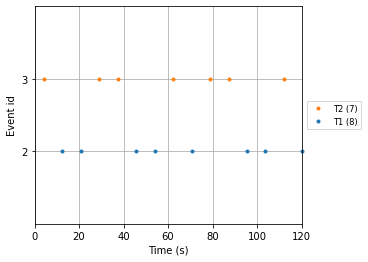

In [8]:
fig = mne.viz.plot_events(events_from_annot, sfreq=raw.info['sfreq'],
                          first_samp=raw.first_samp, event_id=event_dict)
fig.subplots_adjust(right=0.7)

Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 15 events and 113 original time points ...
0 bad epochs dropped
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
combining channels using "gfp"


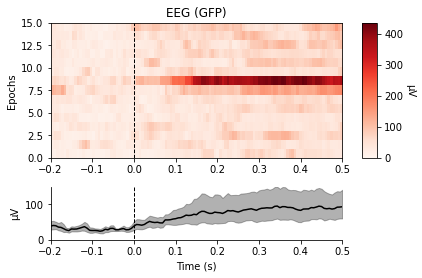

[<Figure size 432x288 with 3 Axes>]

In [9]:
epochs = mne.Epochs(raw, events=events_from_annot, 
                    event_id=event_dict)
 
 
epochs.plot_image()

In [10]:
sfreq=raw.info['sfreq']

Text(0.5, 1.0, 'Sample channels')

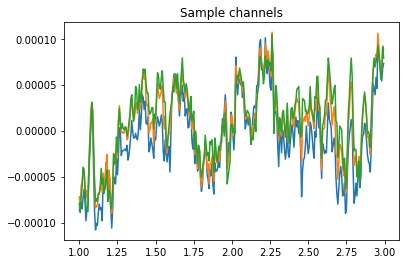

In [11]:
data,times=raw[:3,int(sfreq*1):int(sfreq*3)]
plt.plot(times,data.T)
plt.title("Sample channels")

In [13]:
data, times = raw[:,:]

In [14]:
data.shape

(64, 20000)

Text(0.5, 1.0, 'Full channels')

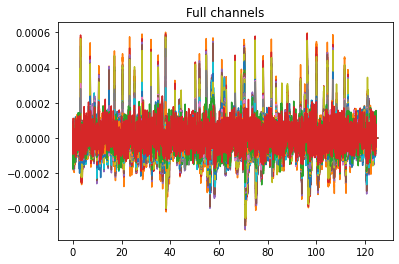

In [15]:
plt.plot(times,data.T)
plt.title("Full channels")

In [25]:
data, times = raw[[8, 10, 12],:]

Text(0.5, 1.0, 'Important channels')

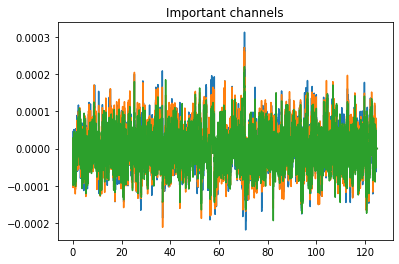

In [26]:
plt.plot(times,data.T)
plt.title("Important channels")

In [27]:
chan_list = ['C3', 'Cz', 'C4']

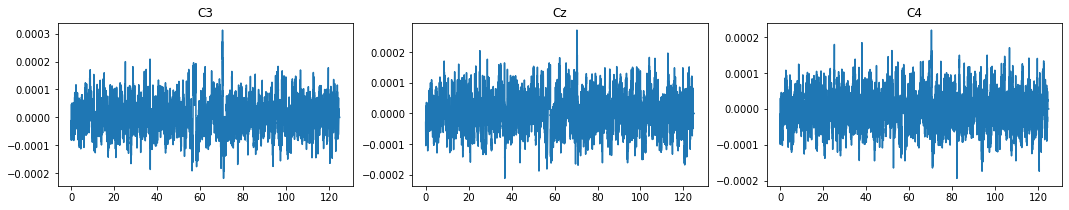

In [30]:
import matplotlib.pyplot as plt
import matplotlib as mpl

def signal_overview(signals, times, names):
    '''
    show the overview of EEG signals
    
    Parameters
    ---------
    signals: 2-d array
        the EEG signal data
    names: 1-d array
        the list of channels name
    '''
    plt.figure(figsize = (18, 3))
    for i in range(len(names)):
        plt.subplot(1, len(names), i + 1)
        plt.plot(times, signals[i].T)
        plt.title(names[i])
    plt.show()

signal_overview(data, times, chan_list)

In [31]:
events_from_annot, event_dict = mne.events_from_annotations(raw)

Used Annotations descriptions: ['T0', 'T1', 'T2']


In [33]:
print(events_from_annot)

[[    0     0     1]
 [  672     0     3]
 [ 1328     0     1]
 [ 2000     0     2]
 [ 2656     0     1]
 [ 3328     0     2]
 [ 3984     0     1]
 [ 4656     0     3]
 [ 5312     0     1]
 [ 5984     0     3]
 [ 6640     0     1]
 [ 7312     0     2]
 [ 7968     0     1]
 [ 8640     0     2]
 [ 9296     0     1]
 [ 9968     0     3]
 [10624     0     1]
 [11296     0     2]
 [11952     0     1]
 [12624     0     3]
 [13280     0     1]
 [13952     0     3]
 [14608     0     1]
 [15280     0     2]
 [15936     0     1]
 [16608     0     2]
 [17264     0     1]
 [17936     0     3]
 [18592     0     1]
 [19264     0     2]]


In [46]:
text = [[], [], []]
for index in range(len(events_from_annot)):
    if index == len(events_from_annot) - 1:
        text[events_from_annot[index][2] - 1].append(data[:, events_from_annot[index][0] : data.shape[1]])
    else:
        text[events_from_annot[index][2] - 1].append(data[:, events_from_annot[index][0] : events_from_annot[index + 1][0]])
text

[[array([[-1.2e-05, -1.9e-05, -3.0e-05, ..., -1.0e-06,  1.3e-05,  3.2e-05],
         [-2.9e-05, -4.1e-05, -5.3e-05, ..., -5.0e-06,  6.0e-06,  2.0e-05],
         [-1.5e-05, -3.4e-05, -4.8e-05, ..., -3.2e-05, -3.6e-05, -2.3e-05]]),
  array([[-7.0e-06,  5.0e-06,  4.0e-06, ...,  1.5e-05,  2.0e-06, -2.0e-06],
         [ 2.0e-05,  3.4e-05,  2.0e-05, ...,  2.1e-05,  4.0e-06,  7.0e-06],
         [ 2.1e-05,  3.6e-05,  2.3e-05, ...,  2.2e-05,  2.1e-05,  2.4e-05]]),
  array([[ 5.7e-05,  3.4e-05,  2.5e-05, ..., -3.3e-05, -4.0e-06,  2.3e-05],
         [ 4.8e-05,  2.1e-05,  4.0e-06, ..., -4.8e-05, -2.8e-05, -7.0e-06],
         [ 3.1e-05,  9.0e-06, -4.0e-06, ..., -4.1e-05, -2.3e-05, -2.3e-05]]),
  array([[ 1.6e-05,  1.7e-05,  2.9e-05, ...,  4.5e-05,  3.4e-05,  2.6e-05],
         [-7.0e-06, -7.0e-06, -1.0e-06, ...,  6.2e-05,  6.8e-05,  6.2e-05],
         [ 1.0e-05, -1.1e-05, -4.0e-06, ...,  1.6e-05,  6.0e-06,  1.2e-05]]),
  array([[-4.0e-05, -4.3e-05, -4.5e-05, ..., -4.0e-06, -3.3e-05, -6.0e-05],
    

In [41]:
len(events_from_annot)

30

In [1]:
# get dependency
import numpy as np
import scipy.io
import torch

import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
# list of channel
__chan_list = ['C3', 'Cz', 'C4']
    
__event_dict = {1: 'left fist', 2: 'right fist',
                3: 'imagine left fist', 4: 'imagine right fist',
                5: 'both fist', 6: 'both feet',
                7: 'imagine both fist', 8: 'imagine both feet'}

In [4]:
"R{0:0=2d}".format(7)

'R07'

In [1]:
import sys
sys.path.append('..')
from data_extractor_v2 import *

In [2]:
database = [[], [], [], [],
           [], [], [], []]
for i in range(1, 110, 2):
    extractor = Extractor("S{0:0=3d}".format(i), database)

Extracting EDF parameters from /home/dhz/bci-data/files/S001/S001R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S001/S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S001/S001R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S001/S001R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S001/S001R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used 

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S007/S007R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S007/S007R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S007/S007R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S007/S007R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from 

Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S013/S013R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S013/S013R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S013/S013R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S013/S013R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S013/S013R14.edf...
EDF fil

Extracting EDF parameters from /home/dhz/bci-data/files/S019/S019R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S019/S019R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S021/S021R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S021/S021R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S021/S021R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used 

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S027/S027R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S027/S027R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S027/S027R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S027/S027R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from 

Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S033/S033R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S033/S033R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S033/S033R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S033/S033R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S033/S033R12.edf...
EDF fil

Extracting EDF parameters from /home/dhz/bci-data/files/S039/S039R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S039/S039R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S039/S039R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S039/S039R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S041/S041R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used 

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S047/S047R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S047/S047R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S047/S047R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S047/S047R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from 

Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S053/S053R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S053/S053R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S053/S053R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S053/S053R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S053/S053R10.edf...
EDF fil

Extracting EDF parameters from /home/dhz/bci-data/files/S059/S059R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S059/S059R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S059/S059R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S059/S059R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S059/S059R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used 

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S065/S065R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S065/S065R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S067/S067R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S067/S067R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from 

Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S073/S073R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S073/S073R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S073/S073R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S073/S073R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S073/S073R08.edf...
EDF fil

Extracting EDF parameters from /home/dhz/bci-data/files/S079/S079R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S079/S079R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S079/S079R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S079/S079R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S079/S079R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used 

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S085/S085R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S085/S085R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S085/S085R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S085/S085R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from 

Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S091/S091R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S093/S093R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S093/S093R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S093/S093R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S093/S093R06.edf...
EDF fil

Extracting EDF parameters from /home/dhz/bci-data/files/S099/S099R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S099/S099R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S099/S099R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S099/S099R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S099/S099R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used 

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S105/S105R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S105/S105R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S105/S105R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /home/dhz/bci-data/files/S105/S105R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from 

In [4]:
print(len(database))

8


In [5]:
labels, data = data_normalization(database)

/home/dhz/experiment-BCI/data_extractor_v2.py:98: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  return torch.tensor(labels), torch.tensor(data)


In [6]:
data.shape
labels.shape

torch.Size([9907, 8])